<a href="https://colab.research.google.com/github/Zaedul-Islam/Machine_Learning_Projects/blob/master/Cereal/Cereal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hierarchical Clustering on Cereal Data**

## **Importing the libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Seaborn is a python library for visualizing data. It is built on top of matplotlib and closely integrated with pandas data structure
import seaborn as sb 

# Some setting for this notebook to actually show the graphs inline
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

## **Reading 'cereal' dataset**

In [26]:
filepath = '/content/drive/My Drive/Colab Notebooks/Cereal/Dataset/cereal-updated.csv'
dataset = pd.read_csv(filepath)

dataset.head()

,Cereals,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6,280.0,25,3,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8,135.0,0,3,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5,320.0,25,3,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0,330.0,25,3,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8,NaN,25,3,34.384843


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cereals   77 non-null     object 
 1   calories  77 non-null     int64  
 2   protein   77 non-null     int64  
 3   fat       77 non-null     int64  
 4   sodium    77 non-null     int64  
 5   fiber     77 non-null     float64
 6   carbo     77 non-null     float64
 7   sugars    77 non-null     int64  
 8   potass    75 non-null     float64
 9   vitamins  77 non-null     int64  
 10  shelf     77 non-null     int64  
 11  rating    77 non-null     float64
dtypes: float64(4), int64(7), object(1)
memory usage: 7.3+ KB


**Findings:**
1.  The *cereal* dataset contains 12 columns and 77 rows, but no missing values.


## **Questions & Answers**

### 1. Is a strong correlation between dietary fiber and potassium?

1. Plotting *fiber* in x-axis and *potass* in y-axis of a Scatter Diagram

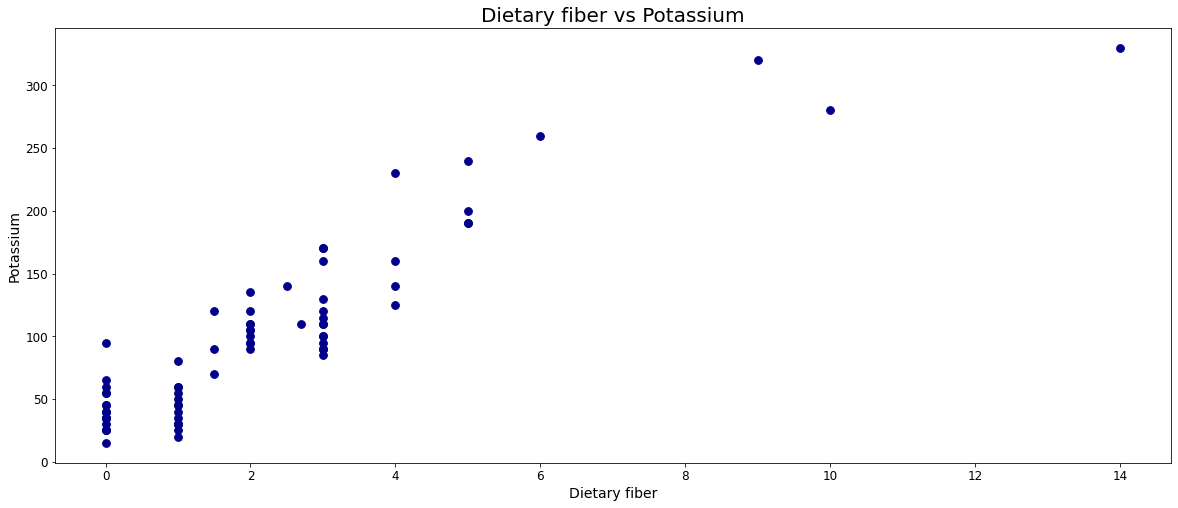

In [28]:
dataset.plot(x = 'fiber', y = 'potass', kind = 'scatter', figsize = (20, 8), title = 'Dietary fiber vs Potassium', fontsize = 12, c = 'DarkBlue',  s = 60)

plt.xlabel('Dietary fiber', fontsize = 14)
plt.ylabel('Potassium', fontsize = 14)
plt.rcParams['axes.titlesize'] = 20

# To show the Scatter Diagram
plt.show()

**Findings:**
1. Yes, there is a strong correlation between dietary fiber and potassium. Examining the plot area in the graph, the points produce a lower-left-to-upper-right pattern (see below), which shows a positive correlation between dietary fiber and potassium to be specific. This pattern means that when the score of one observation is high, we expect the score of the other observation to be high as well, and vice versa. The below Scatter plot shows the correlation,

> `DataFrame.corr(self, method='pearson', min_periods=1) → 'DataFrame'` |
> Compute pairwise correlation of columns, excluding NA/null values.

A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.

**Method of correlation:**
* **pearson**: standard correlation coefficient
* **kendall**: Kendall Tau correlation coefficient
* **spearman**: Spearman rank correlation

In [29]:
# method='pearson'
pearsonCorrelation = dataset['fiber'].corr(dataset['potass'], method='pearson')
print("pearson: ", pearsonCorrelation)

# method='kendall'
kendallCorrelation = dataset['fiber'].corr(dataset['potass'], method='kendall')
print("kendall: ", kendallCorrelation)

# method='spearman'
spearmanCorrelation = dataset['fiber'].corr(dataset['potass'], method='spearman')
print("spearman: ", spearmanCorrelation)

pearson:  0.9115276937579344
kendall:  0.7199265239456974
spearman:  0.8651753038218196


**Findings:**
1. Using all 3 methods to find correlation bewteen *fiber* and *potass*, it's clearly evident that there’s a very strong positive correlation between them.

### 3. See other correlation between the data given in the files.

In [34]:
# Calculating the Pearson Corellation
pearsonCorrelation = dataset.corr(method = 'pearson')

pearsonCorrelation

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.072063,0.265356,0.097234,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.563706,0.007335,0.133865,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.200445,-0.031156,0.263691,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.042632,0.361477,-0.069719,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.911528,-0.032243,0.297539,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.338301,0.258148,-0.101790,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,-0.002600,0.125137,0.100438,-0.759675
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.338301,-0.002600,1.000000,-0.005427,0.385784,0.416009
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,-0.005427,1.000000,0.299262,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.385784,0.299262,1.000000,0.025159


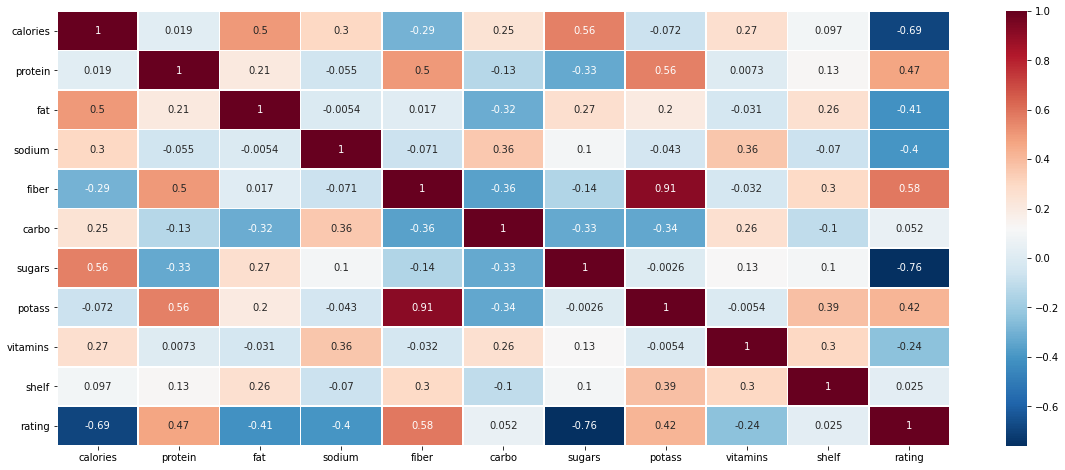

In [46]:
plt.figure(figsize = (20, 8))

sb.heatmap(pearsonCorrelation, 
            xticklabels=pearsonCorrelation.columns,
            yticklabels=pearsonCorrelation.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.8)

**Results and Interpretation:**

A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables. In our case, the maroon shows very strong correlations. The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.